# Aula 1 - Data Science: Dados e Visualização

## Conhecendo nossos dados

In [17]:
import pandas as pd

In [18]:
notas = pd.read_csv('ratings.csv')

In [19]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
notas.shape

(100836, 4)

In [21]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [23]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [24]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [25]:
notas['nota'].mean()

3.501556983616962

## Visualizando dados com histograma e boxplot

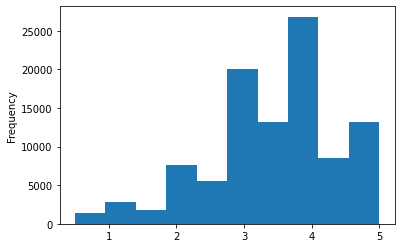

In [26]:
notas.nota.plot(kind='hist')

In [27]:
notas.nota.median()

3.5

In [28]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [29]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


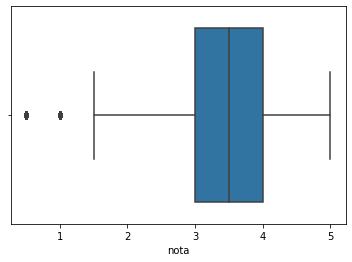

In [30]:
sns.boxplot(notas.nota)

# Aula 2 - Análise Exploratória

## Análise exploratória de dados e mais gráficos

In [31]:
filmes = pd.read_csv('movies.csv')
filmes. columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
notas.query('filmeId == 2').nota.mean()

3.4318181818181817

In [34]:
notas.groupby('filmeId')

In [35]:
notas.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [36]:
notas.groupby('filmeId').nota.mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [37]:
notas.groupby('filmeId').nota.mean().to_frame()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [38]:
medias_por_filme = notas.groupby('filmeId').nota.mean()

In [39]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

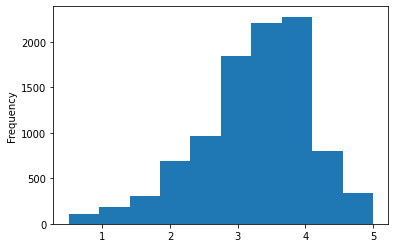

In [40]:
medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


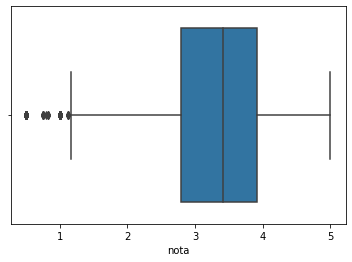

In [41]:
sns.boxplot(medias_por_filme)

In [42]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


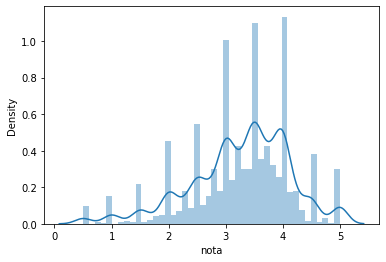

In [43]:
sns.distplot(medias_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


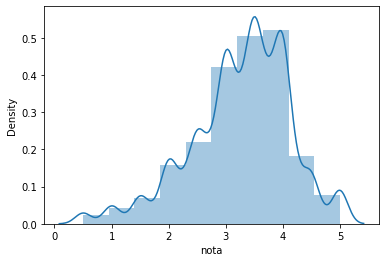

In [44]:
sns.distplot(medias_por_filme, bins=10)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

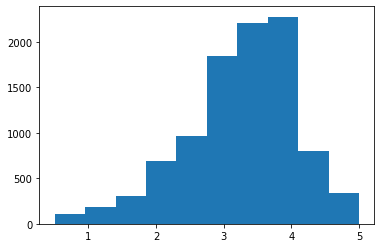

In [45]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)

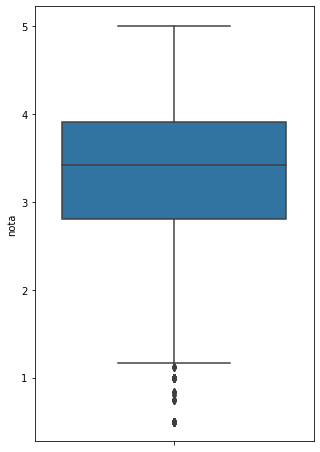

In [46]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

# Aula 3 – Variáveis

## Tipos de Variáveis

In [47]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [48]:
# Categórica Nominal:

tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [49]:
# Categórica Ordinal

# escolaridade: 1°, 2° e 3° graus
# 1 grau < 2 grau < 3 grau

In [50]:
# budget => orçamento => quantitativo contínuo 

In [51]:
# Quantidade de votos => 1, 2, 3, 4, não tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 não tem 2.7

# Aula 4 – Data Visualization

## Visualizando gráficos por categoria

In [52]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ro       2
ar       2
cs       2
ta       2
id       2
nb       1
ps       1
hu       1
pl       1
no       1
is       1
xx       1
vi       1
sl       1
af       1
ky       1
te       1
tr       1
el       1
Name: original_language, dtype: int64

In [53]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ro', 'ar', 'cs', 'ta', 'id', 'nb',
       'ps', 'hu', 'pl', 'no', 'is', 'xx', 'vi', 'sl', 'af', 'ky', 'te', 'tr',
       'el'],
      dtype='object')

In [54]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [55]:
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


In [56]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


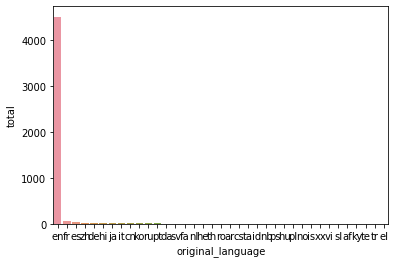

In [57]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_de_lingua)

In [58]:
print(sns.__version__)

0.11.2


In [59]:
!pip install seaborn=0.9.0

ERROR: Invalid requirement: 'seaborn=0.9.0'
Hint: = is not a valid operator. Did you mean == ?


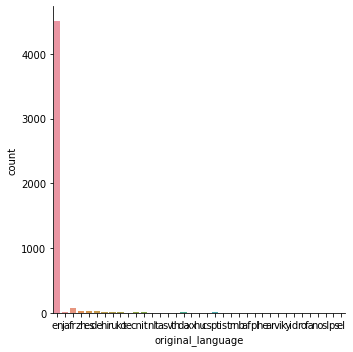

In [60]:
sns.catplot(x = 'original_language', kind='count', data = tmdb)

## Passando uma mensagem através de visualização

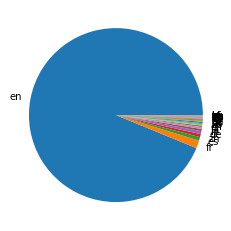

In [61]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])
plt.show()

In [62]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = sum(total_por_lingua)
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [63]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


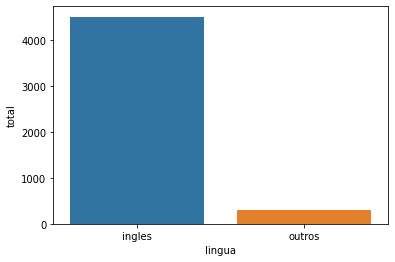

In [64]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

## Visualizando as outras categorias

([<matplotlib.patches.Wedge at 0x7f136716edd0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

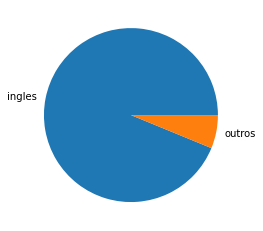

In [65]:
plt.pie(dados['total'], labels = dados['lingua'])

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

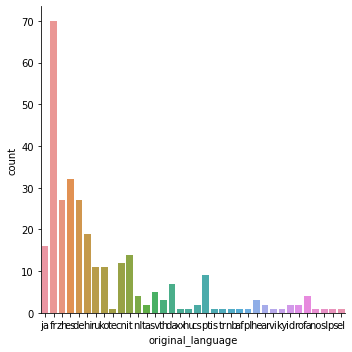

In [71]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles)

# Aula 5 – Continuando Com Visualização

## Refinando Visualizações

<Figure size 360x720 with 0 Axes>

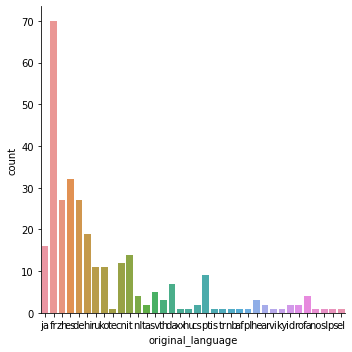

In [75]:
plt.figure(figsize=(5, 10))
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles)

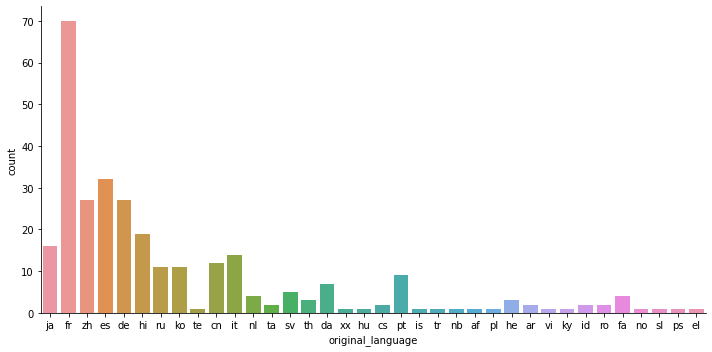

In [76]:
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles, aspect=2)

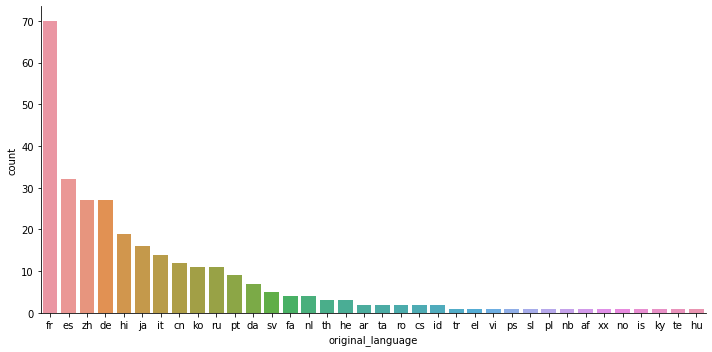

In [77]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles, aspect=2, order=total_por_lingua_de_outros_filmes.index)

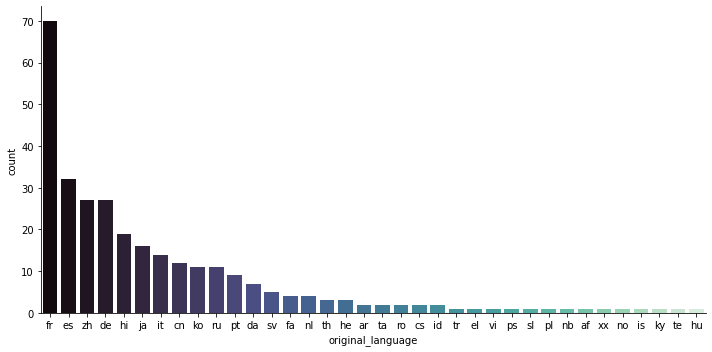

In [85]:
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles, aspect=2, palette='mako', order=total_por_lingua_de_outros_filmes.index)

# Aula 6 – Dados e Estatística

## Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

In [86]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [87]:
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [90]:
print(f'Nota média do Toy Story: {notas_toy_story.nota.mean():.2f}')
print(f'Nota média do Jumanji: {notas_jumanji.nota.mean():.2f}')

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [92]:
print(f'Nota mediana do Toy Story: {notas_toy_story.nota.median():.2f}')
print(f'Nota mediana do Jumanji: {notas_jumanji.nota.median():.2f}')

Nota mediana do Toy Story: 4.00
Nota mediana do Jumanji: 3.50


In [98]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [126]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


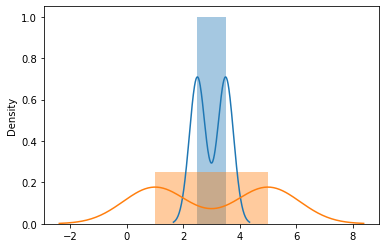

In [108]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

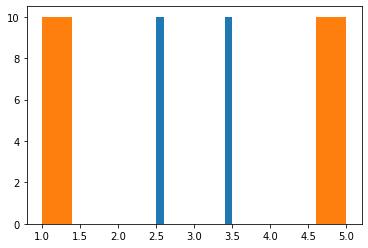

In [109]:
plt.hist(filme1)
plt.hist(filme2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


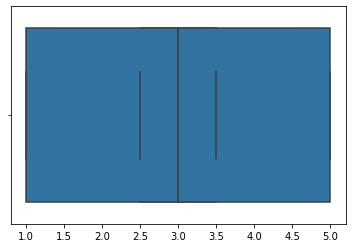

In [110]:
sns.boxplot(filme1)
sns.boxplot(filme2)

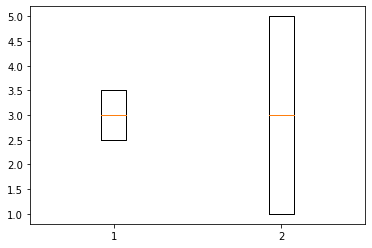

In [115]:
plt.boxplot([filme1, filme2])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


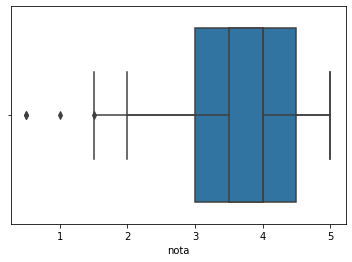

In [117]:
sns.boxplot(notas_toy_story.nota)
sns.boxplot(notas_jumanji.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


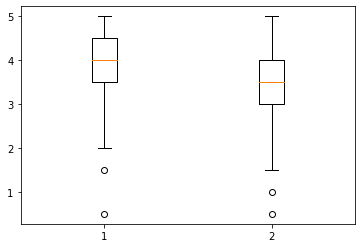

In [119]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])
plt.show()

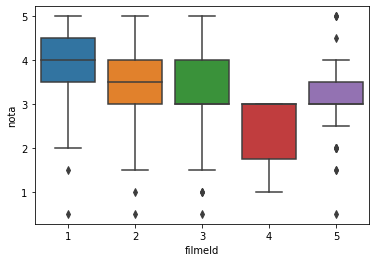

In [122]:
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId == [1,2,3,4,5]'))

In [125]:
print(notas_jumanji.nota.std(), notas_toy_story.nota.std())

0.8817134921476455 0.8348591407114045


0.8348591407114045